# Markov Chain Monte Carlo (MCMC)
** Metropolis–Hastings algorithm** 


You may have read many text books, blogs and papers to help you figure out how the Markov Chain Monte Carlo is used to approximate the posterior distribution. you might find it abit stressful when it comes to understand the link between Markov chain and the approximation of the posterior distribution. I refer you to the first part "MCMC_PartI" before you read the ful story of MCMC here. 

**The key difference between MC and MCMC** 

<b><i> For MC,</i></b>

Given: transition probability matrix (P) / Transition kernel

Goad: find the invariant distribution  $\pi$


<b><i> For MCMC,</i></b> 

Given: joint likelihood instead of the posterior  
Goal: find transition probability density from which samples are drawn to approximate the posterior 


Let us explore the details of MCMC using math.


We have mentioned at the end of part I that we will use the detailed balance equation: 

$$\pi_{i} p_{ij}=\pi_{j} p_{ji}$$  in MCMC


According to the defintion of reversibility (see part I), if the equality in the above equation is satisfied $\pi_{i}$ is the invariant distribution. Recall that $p_{ij}$ approximates the invariant distribution $\pi_{i}$ when the number of steps (n) goes to infinity. Hence, if we assume that the target posterior distribution can be represented by the invariant distribution of an irreducible and aperiodic MC, the samples drawn from the transition (conditional) density after a long run approximates this posterior distribution. It is getting exciting here but do we know the conditional probability density $p_{ij}$?

The answer is NO.

Do not worry! In this case a proposal distribution (q)such as normal distribution with known parameters can be used instead. The equality in the detailed balance equation is not satisfied as $ p \neq q $

$$\pi_{i} q_{ij} \neq \pi_{j} q_{ji}$$

To maintain the equality we multiply the left and right sides of the equation with $\alpha_{ij}$ and  $\alpha_{ji}$ respectively as follows: 

$\pi_{i} q_{ij} \alpha_{ij} = \pi_{j} q_{ji} \alpha_{ji}$............(1)

where  $0 \leq \alpha_{ij}$ and  $\alpha_{ji} \geq 1$

This implies that we can sample from $q_{ij} \alpha_{ij}$ to approximate the posterior distribution.  $q_{ij}$ is known but we need to find  $\alpha_{ij}$


$$\alpha_{ij}= \frac{\alpha_{ji}}{\pi_{i} q_{ij}}  \pi_{j} q_{ji} \leq 1 $$

$$\alpha_{ji}= \frac{\alpha_{ij}}{\pi_{j} q_{ji}}  \pi_{i} q_{ij} \leq 1 $$

$$ r_{ij}= \frac{\alpha_{ji}}{\pi_{i} q_{ij}}$$
$$ r_{ji}= \frac{\alpha_{ij}}{\pi_{j} q_{ji}} $$

by (1) ==> $$ r_{ij}=r_{ji} $$


$$\alpha_{ij}= r_{ij}  \pi_{j} q_{ji} \leq 1 \implies r_{ij} \leq \frac{1}{\pi_{j} q_{ji}} $$

$$\alpha_{ji}= r_{ji}  \pi_{i} q_{ij} \leq 1 \implies r_{ij} \leq \frac{1}{\pi_{i} q_{ij}} $$


$ r_{ij}$ must be smaller than the both terms

$$ r_{ij} = min (\frac{1}{\pi_{j} q_{ji}}, \frac{1}{\pi_{i} q_{ij}}) $$

$$\alpha_{ij}= min (\frac{1}{\pi_{j} q_{ji}}, \frac{1}{\pi_{i} q_{ij}})  \pi_{j} q_{ji}$$

$$\alpha_{ij}= min (1, \frac{ \pi_{j} q_{ji}}{\pi_{i} q_{ij}})  $$

The posterior is involved here as a fraction $\frac{ \pi_{j} }{\pi_{i}}$ which is $\frac{ likelihood_{j} prior_{j}} {likelihood_{i} prior_{i}}$. As you could see, the marginal likelihood is cancelled out and this is the exciting bit about MCMC. 

**How to generate samples from  $q_{ij} \alpha_{ij}$**?
let us assum q to be a normal distribution. Recall that $ 0 \leq \alpha_{ij} \geq 1$. $\alpha_{ij}$ can be considered as a distribution of Bernoulli random variable with parameter $\frac{ \pi_{j} q_{ji}}{\pi_{i} q_{ij}} $. The Bernoulli Rv. has a binary outcome (0,1) i.e (accepted, not accepted in this case). To sum up, The samples drawn from the proposal distribution (q) will be used to evaluate the parameter of the Bernoulli distribution. 

**How to draw a sample from the Bernoulli?**
- Draw a sample u form a continuous uniform distribution $U[0,1]$
- if the sample is less than the Bernlooulli parameter, accept it otherwise, reject it. 
  (The larger the parameter of Bernoulli, the more likely u is smaller than this parameter and the the more   
   probable the sample is accepted).  
   
 Interpretation: The parameter of Bernoulli is the ratio of the posterior probability (actually the joint   
 likelihood) for the new sample to that for the old sample. if this ratio is large, it is more likely that the new sample is accepted. We can see that the target posterior distribution which we could not see at all plays a   key role in the determination of the acceptance criteria for the samples generated from a proposal 
 distribution using the joint likelihood part of its formula. This is so fair. 


**Metropolis–Hastings algorithm** 

1- Choose an inital value (i) for the variable whose posterior distribution is to be targeted. 

2- Sample j (new sample) from the conditional density $q_{ij}$ where i (the old sample) is the mean parameter of
   the normal density q
   
3- The sample j should meet the acceptance criteria denoted by $\alpha$.  This can be done by evaluating 


   $$\frac{ \pi_{j} q_{ji}}{\pi_{i} q_{ij}}$$

   using both the old and new samples i and j respectively. 
   
4- Generate u from $U[0,1]$ and evaluate the following expression: 

   if u < min (1,$ \frac{ \pi_{j} q_{ji}}{\pi_{i} q_{ij}}$) .... accept j
   
    otherwise accept i
    
5- repeat steps (2-4) for a sufficiently long run.
     
We do not obtain a nice analytical form at the end of the process but a set of samples as if they are drawn from the target posterior distribution.

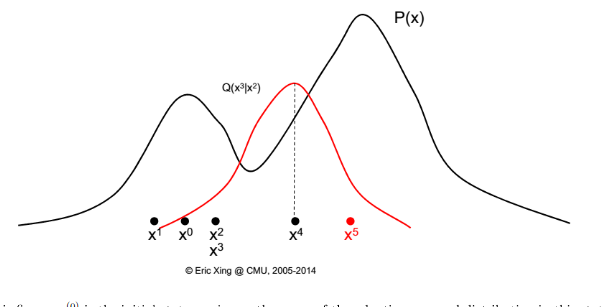

In [4]:
from IPython.display import Image
Image(filename='sss.jpeg')

**Example**
The following code shows how to compute the posterior distribution of the parameter of a binomial distribution using analytical and MCMC methods. The data used here is sequence 100 binary points with 61 points having the value of 1. 

In [385]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st


The posterior distribution of a single parameter namely theta which is the probability of head.

In [6]:
#n: number of trials
#h: number of heads (successes) that takes value between 0 and n
n = 100
h = 61

# The prior ia modelled by Beta distrbution with two parameters a and b
a = 10
b = 10
prior = st.beta(a, b)

# The likelihood is distributed by binomial distribution that takes the number of trials and the probability of success as input arguments
lik = st.binom


Text(0.5,1,'Binomial distribution, E[lik]=n*theta=20')

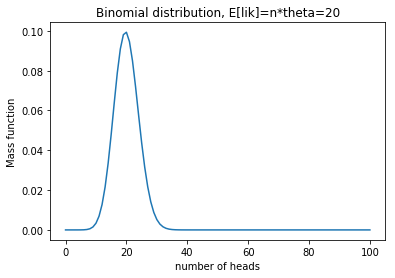

In [7]:
# The pmf of the likelihood
n_head=np.linspace(0,n, n+1)
lik_prob=lik(n,0.2).pmf(n_head)
plt.plot(lik_prob)
plt.xlabel('number of heads')
plt.ylabel('Mass function')
plt.title('Binomial distribution, E[lik]=n*theta=20')

In [8]:
### The joint likelihood 
# It is the product of prior and the likelihood. 
# it appears in the numerator of the posterior distribution. 

def joint_lik(lik, prior, n, h, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return lik(n, theta).pmf(h)*prior.pdf(theta)


In [9]:
#MCMC: 
# Set the variance of the proposal distribution q(y|x, sigma) 
sigma = 0.1

# 1- initialize theta
theta = 0.3
#  The number of iterations which is the number of samples drawn from the proposal distribution
n_iter= 200



In [10]:
# During iterations we will go through the theta space and select the one that meats the acceptance criteria

def sampling(lik, prior, n, h, theta,sigma, n_iter): 
    # to store the accepted samples
    samples =[]
    samples.append(theta)

    # Counter to count the number of accepted samples. 
    naccept = 0

    for i in range(n_iter):
        #2- draw a sample from the proposal distribution 
        theta_new = theta + sigma* st.norm(0, 1.).rvs()
        # 3- compute the acceptance ratio which is the parameter of bernoulli distribution 
        alpha = min(1, joint_lik(lik, prior, n, h, theta_new)/joint_lik(lik, prior, n, h, theta))
    
        # draw a sample from [0,1]
        u = np.random.uniform()
        if u < alpha:
            naccept += 1
            theta = theta_new

        samples.append(theta)
    return samples, naccept

# The samples are approximately drawn from the posterior .

In [11]:
## Exact Inference: Analytical Posterior
# In this example the prior (beta distribution) is conjugate for the likelihood (binomial)
# so the posterior is of the same type as the prior. 

Text(0.5,1,'The density of posterior distribution')

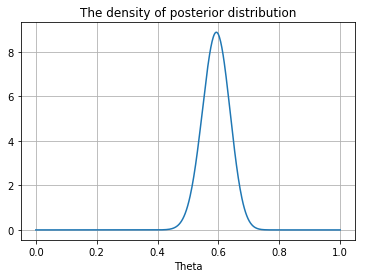

In [12]:
post_dist = st.beta(h+a, n-h+b)
thetas = np.linspace(0, 1, 500)
post_density=post_dist.pdf(thetas)

plt.plot(thetas, post_density)
plt.grid(True)
plt.xlabel('Theta')
plt.title('The density of posterior distribution')

In [13]:
samples, naccepts= sampling(lik, prior, n, h, theta,sigma, n_iter)


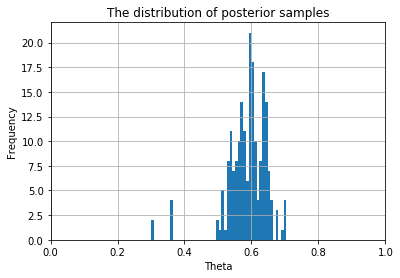

In [14]:
plt.hist(samples,50)
plt.xlabel('Theta')
plt.ylabel('Frequency')
plt.title('The distribution of posterior samples')
plt.xlim([0,1])
plt.grid(True)
plt.show()


In [15]:
# The pecentage of accepted samples
efficiency=naccepts/n_iter
print('Efficiency=',efficiency )

Efficiency= 0.495


In [397]:
# Traces for different initial values of theta during iterations
sample_list=[sampling(lik, prior, n, h, theta,sigma, n_iter)[0] for theta in [0.1, 0.4, 0.9]]
    # Traces for different initial values of theta during iterations


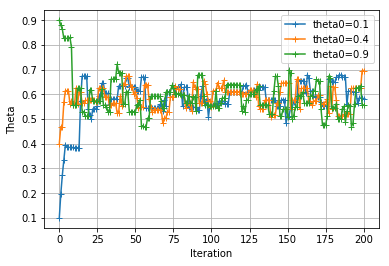

In [400]:
for n in range(len(sample_list)):
    plt.plot(sample_list[n], '-+')
plt.xlabel('Iteration')
plt.ylabel('Theta')
plt.grid(True)
plt.legend(['theta0=0.1', 'theta0=0.4', 'theta0=0.9'])

The cose is taken from https://people.duke.edu/~ccc14/sta-663/MCMC.html 
    